In [56]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import datetime
from datetime import timedelta
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
# read and inspect user_engagements csv data
eng = pd.read_csv(r'C:\Users\spider\Documents\Springboard\GitHub\Springboard\Effective_Interviewing_For_Data_Scientists\Relax challenge\takehome_user_engagement.csv', parse_dates=['time_stamp'])
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
eng.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [10]:
# read and inspect users csv data
users = pd.read_csv(r'C:\Users\spider\Documents\Springboard\GitHub\Springboard\Effective_Interviewing_For_Data_Scientists\Relax challenge\takehome_users.csv', encoding='latin')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [11]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [12]:
#Total number of null values in users dataframe
total= users.isnull().sum()
print(total)

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64


In [13]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


## Data Cleaning

In [14]:
# set datetime index with timestamp column
eng.index = eng.time_stamp

In [15]:
# Replace the NaN values for last_session_creation_time to 0
users.loc[users['last_session_creation_time'].isnull(), 'last_session_creation_time'] = 0

In [16]:
# Replace the NaN values for invited_by_user_id to 0
users.loc[users['invited_by_user_id'].isnull(), 'invited_by_user_id'] = 0

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


## Exploratory Data Analysis

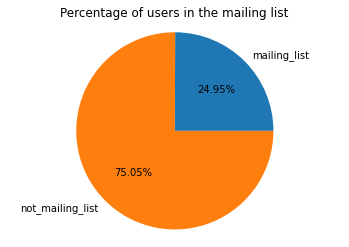

In [19]:
labels = 'mailing_list', 'not_mailing_list'
sizes = [users.opted_in_to_mailing_list.sum(), users.opted_in_to_mailing_list.count() - users.opted_in_to_mailing_list.sum()]

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Percentage of users in the mailing list')
plt.axis('equal')
plt.show()

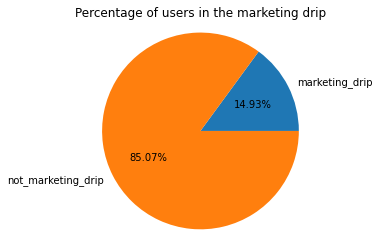

In [21]:
labels = 'marketing_drip', 'not_marketing_drip'
sizes = [users.enabled_for_marketing_drip.sum(), users.enabled_for_marketing_drip.count() - users.enabled_for_marketing_drip.sum()]

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Percentage of users in the marketing drip')
plt.axis('equal')
plt.show()

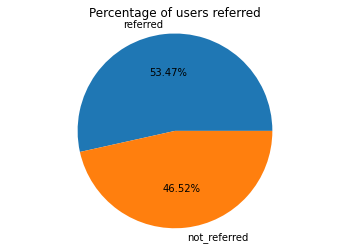

In [22]:
labels = 'referred', 'not_referred'
sizes = [(users.invited_by_user_id != 0).sum(), (users.invited_by_user_id == 0).sum()]

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title('Percentage of users referred')
plt.axis('equal')
plt.show()

In [23]:
by_org_id = users[['object_id', 'org_id']].groupby('org_id').count().sort_values(by=['object_id'], ascending=False).reset_index()
by_org_id = by_org_id.rename(columns={'object_id': 'total_visited'})
by_org_id_plot = by_org_id.head(10)
by_org_id_plot

,org_id,total_visited
0,0,319
1,1,233
2,2,201
3,3,168
4,4,159
5,6,138
6,5,128
7,9,124
8,7,119
9,10,104


Text(0.5, 1.0, 'Count of Users by Top 10 Organization ID')

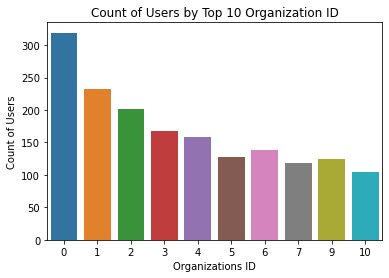

In [24]:
sns.barplot(x='org_id', y='total_visited', data=by_org_id_plot)
plt.xlabel('Organizations ID')
plt.ylabel('Count of Users')
plt.title('Count of Users by Top 10 Organization ID')

In [25]:
by_creation = users[['object_id', 'creation_source']].groupby('creation_source').count().sort_values(by=['object_id'], ascending=False).reset_index()
by_creation

,creation_source,object_id
0,ORG_INVITE,4254
1,GUEST_INVITE,2163
2,PERSONAL_PROJECTS,2111
3,SIGNUP,2087
4,SIGNUP_GOOGLE_AUTH,1385


Text(0.5, 1.0, 'Count of Users by Source of Creation')

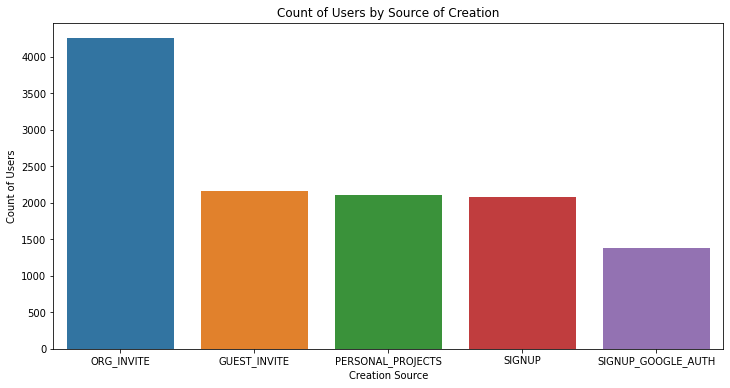

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='creation_source', y='object_id', data=by_creation)
plt.xlabel('Creation Source')
plt.ylabel('Count of Users')
plt.title('Count of Users by Source of Creation')

## Labeling

In [34]:
# convert time_stamp to datetime data type and move it to index
eng.time_stamp = pd.to_datetime(eng.time_stamp)
eng = eng.set_index('time_stamp', drop=True)
engagement = eng.copy()
engagement

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


In [35]:
# function to check if a user has logged into the product on three separate days in at least one seven-day period
def adopted_user(user_id):
    _df = engagement.loc[engagement['user_id'] == user_id]
    _df = _df.resample('D').mean().dropna()
    
    adopted = 0
    
    for i in range(len(_df)-2):
        if _df.index[i+2] - _df.index[i] <= timedelta(days=7):
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [37]:
# apply the function to the dataset
users['adopted'] = users['object_id'].apply(adopted_user)

## Joining Dataset

In [38]:
# merge users and engagement dataset using left join on the user ID and replace null in total_visited by 0
df = pd.merge(users, by_org_id, left_on='object_id', right_on='org_id', how='left')
df = df.drop('org_id_y', axis=1)
df.loc[df['total_visited'].isnull(), 'total_visited'] = 0

In [39]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id_x,invited_by_user_id,adopted,total_visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,233.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,201.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,168.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,159.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,128.0


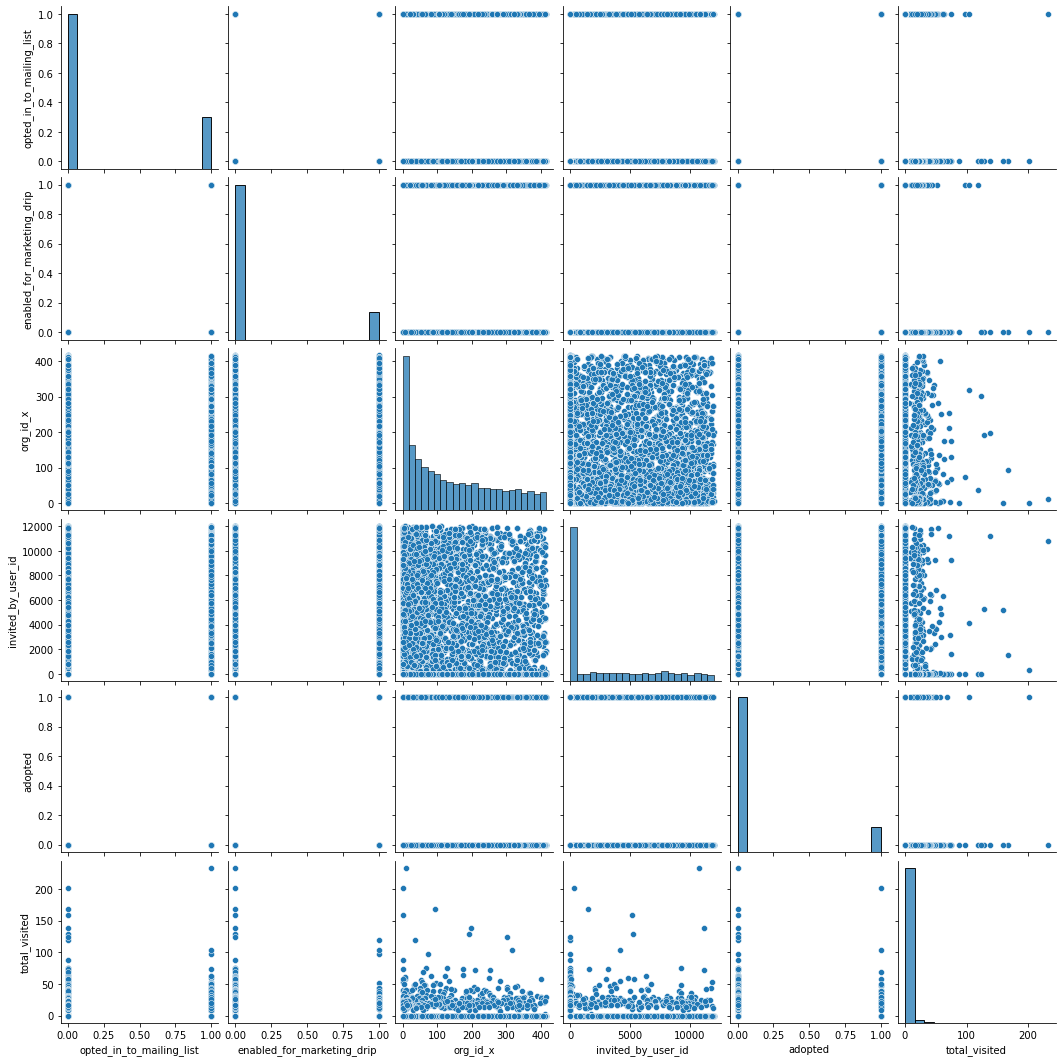

In [40]:
df_corr = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id_x', 'invited_by_user_id', 'adopted', 'total_visited']]
sns.pairplot(df_corr)

In [41]:
# clean up the dataset for modeling input
df['invited'] = [1 if x != 0 else 0 for x in df.invited_by_user_id]
df_ = df.drop(['creation_time', 'last_session_creation_time', 'name', 'email', 'object_id', 'invited_by_user_id'], axis=1)
df_ = df_.astype({'org_id_x':'object'})
df_ = pd.get_dummies(df_)

In [43]:
# separate the data and labels
data = df_.drop('adopted', axis=1)
labels = df_['adopted']

In [44]:
# split into train and test
X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.3, random_state=19)

# normalize the train dataset
X_train = normalize(X_train)
y_train = normalize(y_train)

In [45]:
# initialize the model with 100 estimators
clf = RandomForestClassifier(n_estimators = 100)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=19)

In [46]:
# fit the train data to the model
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
# predict using the test set
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8330555555555555

In [50]:
# check the parameters that are being used by the model
print(clf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [53]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [54]:
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=19, n_jobs = -1)

In [55]:
# fit the train data to the model
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 69.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
 

In [57]:
# print the best estimator
clf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [58]:
# use the best estimator for the model
best_grid = clf_random.best_estimator_

In [59]:
# predict the result
y_pred = best_grid.predict(X_test)

# check the accuracy score
metrics.accuracy_score(y_test, y_pred)

0.8694444444444445

In [60]:
# predict and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      3130
           1       0.00      0.00      0.00       470

    accuracy                           0.87      3600
   macro avg       0.43      0.50      0.47      3600
weighted avg       0.76      0.87      0.81      3600



C:\Users\spider\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3130    0]
 [ 470    0]]


In [64]:
# using the best parameters to get the best important features
feature_imp = pd.Series(best_grid.feature_importances_, index=data.columns).sort_values(ascending=False)
feature_imp

creation_source_PERSONAL_PROJECTS     0.115130
org_id_x_0                            0.057778
creation_source_SIGNUP_GOOGLE_AUTH    0.048888
creation_source_GUEST_INVITE          0.044554
invited                               0.038246
                                        ...   
org_id_x_208                          0.000000
org_id_x_201                          0.000000
org_id_x_194                          0.000000
org_id_x_192                          0.000000
org_id_x_203                          0.000000
Length: 426, dtype: float64

### Conclusion

With little optimization this model can predict an active user with 87% accuracy. With that in mind, it appears that the most important features for making this prediction are the "creation source for personal projects" and the organization the user is from.